In [82]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [83]:
img = cv2.imread('/Users/immortal/Desktop/DataScience/image_classification/testimage/salah1.jpg')
img.shape

(1200, 1200, 3)

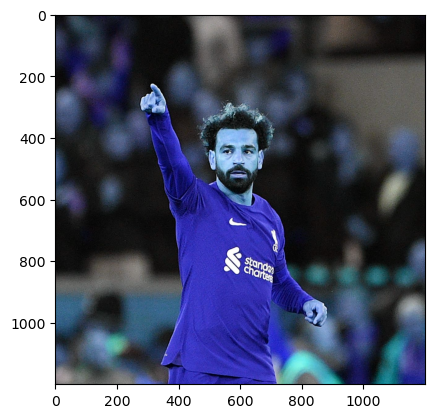

In [84]:
plt.imshow(img)

In [85]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1200, 1200)

In [86]:
gray

array([[ 17,  16,  14, ...,  28,  23,  18],
       [ 16,  14,  12, ...,  27,  24,  22],
       [ 17,  14,  12, ...,  24,  25,  26],
       ...,
       [113, 111, 109, ...,  79,  86,  85],
       [108, 106, 104, ...,  75,  82,  81],
       [103, 101, 100, ...,  69,  75,  75]], dtype=uint8)

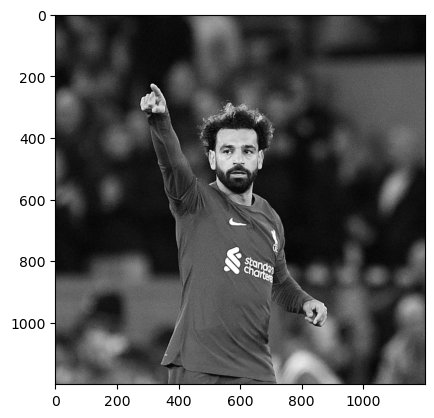

In [87]:
plt.imshow(gray, cmap='gray') # represent image to gray

### Detecting the face

In [88]:
face_cascade = cv2.CascadeClassifier('/Users/immortal/Desktop/DataScience/Classification/opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/immortal/Desktop/DataScience/Classification/opencv/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale (gray, 1.3, 5)
faces # here we detect where is the face we get in the array (x,y,width , height)

array([[489, 361, 210, 210]], dtype=int32)

In [89]:
(x,y,w,h) = faces[0] # store the face in x,y,w,h
x,y,w,h

(489, 361, 210, 210)

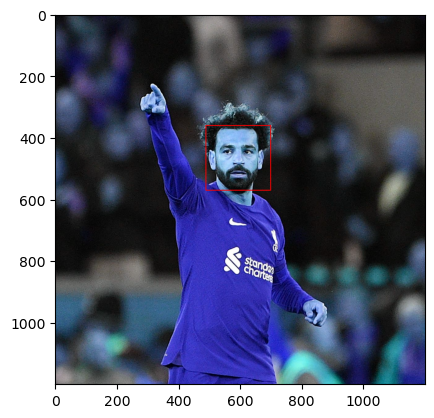

In [90]:
face_img = cv2.rectangle (img, (x,y), (x+w,y+h), (255, 0,0), 2) # here we draw a rectangle on face , the fourht paramter is colour of the rectangle
plt.imshow(face_img)

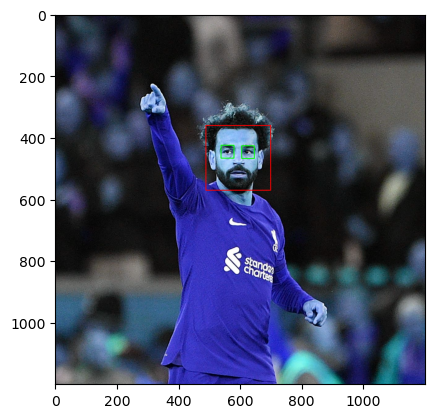

In [10]:
# This code in opencv , and it's to find the eyes from images 
cv2.destroyAllWindows() #  OpenCV function that is used to destroy all windows created by the program. In this case, it closes any windows that may have been created during the image processing.
for (x,y,w, h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0) , 2) # draw the rectangle
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure ()
plt.imshow(face_img,cmap='gray')
plt.show()

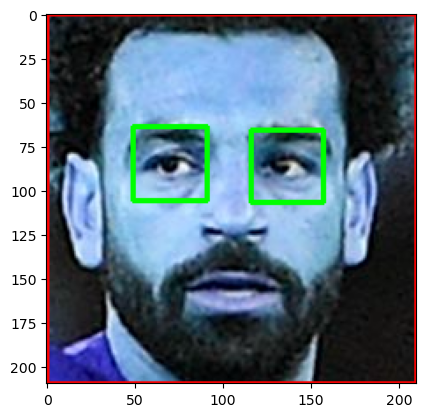

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray') # ROI is (region of interest)

In [32]:
def get_cropped_image(image_path): # function crop the face from images by giving a path of the image
    img = cv2.imread(image_path) # read the image
    # if there is an error in image like other types like gif or other types
    try :
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert it into gray
    except :
        print('There is an error in this image :' , image_path)
        
    faces = face_cascade.detectMultiScale (gray, 1.3, 5) # Detect the faces
    for (x,y,w, h) in faces: # go throgh all the faces to get the eyes 
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2 :
            return roi_color

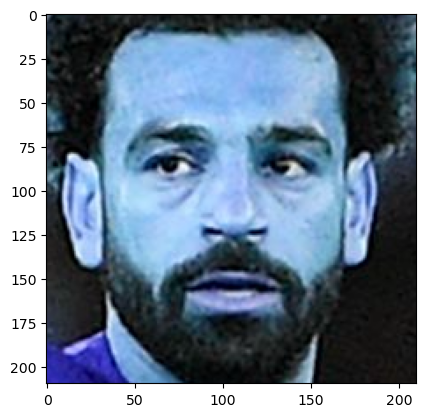

In [13]:
cropped_image=get_cropped_image('/Users/immortal/Desktop/DataScience/image_classification/testimage/salah1.jpg')
plt.imshow(cropped_image) # now we need this image for training

### Data Cleaning Part

In [91]:
# Define the pathes of the images we want to crop and images we want to creat
path_to_data='/Users/immortal/Desktop/DataScience/image_classification/dataset/' # path of non- cropped images (data )
path_to_cr_data='/Users/immortal/Desktop/DataScience/image_classification/cropped/' # the path of new data (cropped) and cleaned

In [92]:
# here we make a list of all paths of files
import os 
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir() :
        img_dirs.append(entry.path)
    

In [93]:
img_dirs

['/Users/immortal/Desktop/DataScience/image_classification/dataset/selena_gomez',
 '/Users/immortal/Desktop/DataScience/image_classification/dataset/abou_trika',
 '/Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek',
 '/Users/immortal/Desktop/DataScience/image_classification/dataset/ahmed_malek',
 '/Users/immortal/Desktop/DataScience/image_classification/dataset/mo_salah']

In [94]:
import shutil # here we creat a crop folder
if os.path.exists(path_to_cr_data): # if the folder exist then remove it 
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data) # creat the folder 

In [95]:
# Here cropped all images throgh the file name (celebrity name ) and appened it to cropped folder
cropped_image_dirs = [] # empty list contains of all image paths
celebrity_file_names_dict = {} # dict contain an celebrity_name as key and lists as a value ( list contains the paths of all images)

for img_dir in img_dirs : # for loop to get the images directories
    count=1 # this variable to save every photo with specific name , for example salah1, salah2
    celebrity_name= img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir): # for loop to acces every photo in file
        print('Working on :' , entry.path)
        try :
            
            roi_color=get_cropped_image(entry.path) # we use cropped image function and assign it to roi_colour
        except :
            print('There is error in image : ' , entry.path)
            continue
        if roi_color is not None :
            
            cropped_folder = path_to_cr_data + celebrity_name # here to creat the specific image path and assign it to cropped folder
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_image_dirs.append(cropped_folder) 
                print('Generating the cropped image in folder : ' , cropped_folder)
                
                
            cropped_file_name=celebrity_name +str(count)+".png"
            cropped_file_path= cropped_folder +"/"+cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color) # function to creat the image 
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1
            

selena_gomez
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/selena_gomez/sub-buzz-7156-1675455409-4.jpg
Generating the cropped image in folder :  /Users/immortal/Desktop/DataScience/image_classification/cropped/selena_gomez
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/selena_gomez/1448421833.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/selena_gomez/1198930383.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/selena_gomez/SelenaGomez.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/selena_gomez/040122-Selena-Gomez-Lead-2000-15541246e2734bfdb0952c6db7158246.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/selena_gomez/Uu4ifVUXaFpUw6qxoZ7EjU.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/selena_gomez/selena-gomez-01-gty-iwb-220729_1659101465935_hpMain_1x1_608

Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/selena_gomez/selena_gomez_1438558737.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/selena_gomez/65489165-0-image-a-63_1670832155265.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/selena_gomez/selena_smod6e.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/selena_gomez/selena-gomez-0075160a584641d5861377de16b7c391.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/selena_gomez/Selena-Gomez-Says-She-Wishes-She-Looked-Like-Bella-Hadid.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/selena_gomez/1455615052.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/selena_gomez/selena-gomez-acting.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/selena_gomez/selena-gomez-gg-rc-02-billboard-1548

Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/abou_trika/1200-L-the-total-caf-champions-league-portrait-mohamed-aboutrika.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/abou_trika/mohamed-aboutrika-35f6770c-01ef-46ec-8186-9030b83068f-resize-750.png
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/abou_trika/Backlash.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/abou_trika/125795.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/abou_trika/mohamed-aboutrika-1.png
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/abou_trika/avatar.png
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/abou_trika/Mohamed-Aboutrika.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/abou_trika/desktop-wallpaper-mohamed-aboutrika-sanfrecce-hiroshima-v-al-mohamed-

Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/gettyimages-1127184968.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/2023_1_largeimg_1474531610.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/c43JaaH8.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/1539849164-Rami.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/1564504197581.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/MV5BODA3OTM4ODU0MV5BMl5BanBnXkFtZTgwNjQ5Njg3NjM_.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/rami-lede.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/gettyimages-1078617018.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_ma

Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/Hot-Rami-Malek-Pictures.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/1471586-2147100112.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/202101180445174517.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/_107727141_malek1_reuters.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/_103956964_rami_getty.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/mr-robot-tribeca.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/gettyimages-1079463052.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/kristen-stewart-rami-malek.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/r

Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/FZ3UMBHOCRDMJNMB6JGV74XRDM.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/29155914033_13779919ac_z.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/011127587-f100f0e6-42dc-4e37-b14f-c938e0dce51c.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/1016731_7856361_788_updates.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/3016.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/1601.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/MV5BYWExYWQ1Y2YtNmUxNC00MGVhLWExYjYtOWYzZWUzMjRjMTIzXkEyXkFqcGdeQWxpenpp.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/rami_malek/GQ-Spain-Rami-Malek-March-2023-1.jpg
Working on : 

Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/ahmed_malek/MV5BMDhlZTJmNzUtMzFmOC00ZjZiLTgyYjYtNjA4NjljMDg4ZWVhXkEyXkFqcGdeQXVyMTUwOTM5MzUx.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/ahmed_malek/director-amr-salama-and-actor-ahmed-malek-from-the-film-sheikh-jackson-pose-for-a-portrait.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/ahmed_malek/E-AHMED-MALEK_2-819x1024.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/ahmed_malek/malik.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/ahmed_malek/40219.jpeg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/ahmed_malek/Screen-Shot-2018-04-11-at-11.36.58-AM.png
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/ahmed_malek/24.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/ahmed_malek/m

Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/mo_salah/salah-12272021-ftr-getty.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/mo_salah/mohamed-salah-gq-sports-cover-februray-2022-06.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/mo_salah/Fb_dNWlWAAksTfU.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/mo_salah/7325ee45ef6e709c.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/mo_salah/Goal_HIC_-_LinkedIn_(2).jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/mo_salah/_104172840_gettyimages-923757862.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/mo_salah/COMP_LY_MO-SALAH.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/mo_salah/joueur-mohamed-salah.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/da

libpng warning: iCCP: known incorrect sRGB profile


Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/mo_salah/thumb_61069_default_news_size_5.jpeg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/mo_salah/محمد_صلاح.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/mo_salah/0_GettyImages-1395219288.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/mo_salah/7.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/mo_salah/_methode_times_prod_web_bin_6ea78bee-c1b9-11ed-89bb-9ee8b04f3f4c.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/mo_salah/2HGBFDK-copy-2.jpeg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/mo_salah/Mo.jpg
Working on : /Users/immortal/Desktop/DataScience/image_classification/dataset/mo_salah/4c8834d1b298a9ea6185a551e88fb740Y29udGVudHNlYXJjaGFwaSwxNjc4MTM0OTA4-2.71252993.jpg
Working on : /Users/immortal/Desktop/D

In [96]:
import numpy as np 
import pywt 
import cv2
# This function takes an image as an input and performs a two-dimensional wavelet transform on it 
def w2d(img, mode= 'haar', level=1): # big thanks to stackoverflow for this function :) !!
    imArray = img
    #Datatype conversions 
    #convert to grayscale
    imArray = cv2.cvtColor( imArray, cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    #Process Coefficients 
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;
    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    return imArray_H

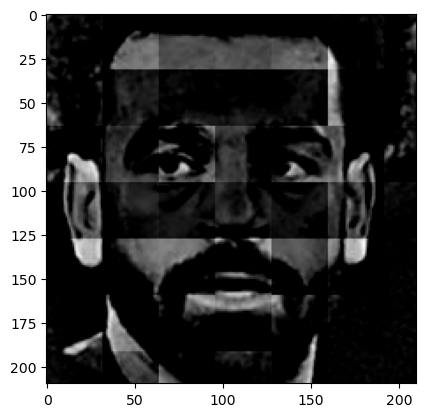

In [97]:
# here an example to use w2d function
im_har = w2d(cropped_image, 'db1',5) # cropped_image we used it before
plt.imshow(im_har, cmap='gray')

In [98]:
celebrity_file_names_dict

{'selena_gomez': ['/Users/immortal/Desktop/DataScience/image_classification/cropped/selena_gomez/selena_gomez1.png',
  '/Users/immortal/Desktop/DataScience/image_classification/cropped/selena_gomez/selena_gomez2.png',
  '/Users/immortal/Desktop/DataScience/image_classification/cropped/selena_gomez/selena_gomez3.png',
  '/Users/immortal/Desktop/DataScience/image_classification/cropped/selena_gomez/selena_gomez4.png',
  '/Users/immortal/Desktop/DataScience/image_classification/cropped/selena_gomez/selena_gomez5.png',
  '/Users/immortal/Desktop/DataScience/image_classification/cropped/selena_gomez/selena_gomez6.png',
  '/Users/immortal/Desktop/DataScience/image_classification/cropped/selena_gomez/selena_gomez7.png',
  '/Users/immortal/Desktop/DataScience/image_classification/cropped/selena_gomez/selena_gomez8.png',
  '/Users/immortal/Desktop/DataScience/image_classification/cropped/selena_gomez/selena_gomez9.png',
  '/Users/immortal/Desktop/DataScience/image_classification/cropped/selena_

### Hint : At this step we deleted some images manualy cause there is images has a less pixles and nois , and there is another images don't related to the person

In [99]:
class_dict={} # here we make dict to assign numbers to celebrity names
count=0
for celebrity_name in celebrity_file_names_dict.keys ():
    class_dict[celebrity_name] = count
    count=count+1
class_dict    

{'selena_gomez': 0,
 'abou_trika': 1,
 'rami_malek': 2,
 'ahmed_malek': 3,
 'mo_salah': 4}

In [100]:
X,y=[],[]
for celebrity_name, training_files in celebrity_file_names_dict.items() : # loop for the dict we creat
    for training_image in training_files: # loop for every images in single file
        img = cv2.imread(training_image)
        if img is None: # because we deletes some images manually and continue the loop
            continue
        scalled_raw_img = cv2.resize(img, (32, 32)) #scalled the images in one scale because the images has diffrent scales
        img_har = w2d(img, 'db1',5) # convert the image
        scalled_img_har = cv2.resize(img_har, (32, 32)) # scalled the converted image
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))) # numpy has function to stack the images
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) # these warnings becaues he didn't find the images we replaced

[ WARN:0@122527.355] global loadsave.cpp:244 findDecoder imread_('/Users/immortal/Desktop/DataScience/image_classification/cropped/selena_gomez/selena_gomez12.png'): can't open/read file: check file path/integrity
[ WARN:0@122527.355] global loadsave.cpp:244 findDecoder imread_('/Users/immortal/Desktop/DataScience/image_classification/cropped/selena_gomez/selena_gomez13.png'): can't open/read file: check file path/integrity
[ WARN:0@122527.358] global loadsave.cpp:244 findDecoder imread_('/Users/immortal/Desktop/DataScience/image_classification/cropped/selena_gomez/selena_gomez15.png'): can't open/read file: check file path/integrity
[ WARN:0@122527.391] global loadsave.cpp:244 findDecoder imread_('/Users/immortal/Desktop/DataScience/image_classification/cropped/selena_gomez/selena_gomez22.png'): can't open/read file: check file path/integrity
[ WARN:0@122527.897] global loadsave.cpp:244 findDecoder imread_('/Users/immortal/Desktop/DataScience/image_classification/cropped/selena_gomez/

[ WARN:0@122528.835] global loadsave.cpp:244 findDecoder imread_('/Users/immortal/Desktop/DataScience/image_classification/cropped/rami_malek/rami_malek64.png'): can't open/read file: check file path/integrity
[ WARN:0@122528.842] global loadsave.cpp:244 findDecoder imread_('/Users/immortal/Desktop/DataScience/image_classification/cropped/rami_malek/rami_malek67.png'): can't open/read file: check file path/integrity
[ WARN:0@122528.842] global loadsave.cpp:244 findDecoder imread_('/Users/immortal/Desktop/DataScience/image_classification/cropped/rami_malek/rami_malek68.png'): can't open/read file: check file path/integrity
[ WARN:0@122528.849] global loadsave.cpp:244 findDecoder imread_('/Users/immortal/Desktop/DataScience/image_classification/cropped/rami_malek/rami_malek70.png'): can't open/read file: check file path/integrity
[ WARN:0@122528.858] global loadsave.cpp:244 findDecoder imread_('/Users/immortal/Desktop/DataScience/image_classification/cropped/rami_malek/rami_malek72.png')

In [101]:
len(X[0]) # the len of the first image

4096

In [102]:
X[0] # this is the first image array

array([[15],
       [24],
       [41],
       ...,
       [ 0],
       [ 0],
       [23]], dtype=uint8)

In [103]:
X =np.array(X).reshape(len(X) ,4096).astype(float)
X.shape

(271, 4096)

### Building a model

In [104]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [106]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train) 
pipe.score(X_test, y_test)

0.75

In [107]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.75      0.75      0.75         8
           2       0.68      0.91      0.78        23
           3       0.73      0.53      0.62        15
           4       1.00      0.75      0.86         8

    accuracy                           0.75        68
   macro avg       0.80      0.73      0.75        68
weighted avg       0.77      0.75      0.75        68



In [108]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import GridSearchCV

In [109]:
# Dict that has models we want to try with paramters
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [110]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False) # Here we use standardScaler and cross validation to fit our model
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.802683,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.640488,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.797805,{'logisticregression__C': 1}


In [117]:
scores #these scores is for validation

[{'model': 'svm',
  'best_score': 0.8026829268292683,
  'best_params': {'svc__C': 1, 'svc__kernel': 'linear'}},
 {'model': 'random_forest',
  'best_score': 0.6404878048780487,
  'best_params': {'randomforestclassifier__n_estimators': 10}},
 {'model': 'logistic_regression',
  'best_score': 0.7978048780487804,
  'best_params': {'logisticregression__C': 1}}]

In [111]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8382352941176471

In [112]:
best_estimators['random_forest'].score(X_test,y_test)

0.5

In [113]:
best_estimators['svm'].score(X_test,y_test)

0.7941176470588235

In [114]:
best_clf=best_estimators['logistic_regression']

I chose logisticRegression model because it performs well in the testing , aslo  performing well in validation

In [115]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[11,  0,  2,  1,  0],
       [ 0,  7,  1,  0,  0],
       [ 0,  0, 22,  1,  0],
       [ 1,  1,  4,  9,  0],
       [ 0,  0,  0,  0,  8]])

Text(95.72222222222221, 0.5, 'Truth')

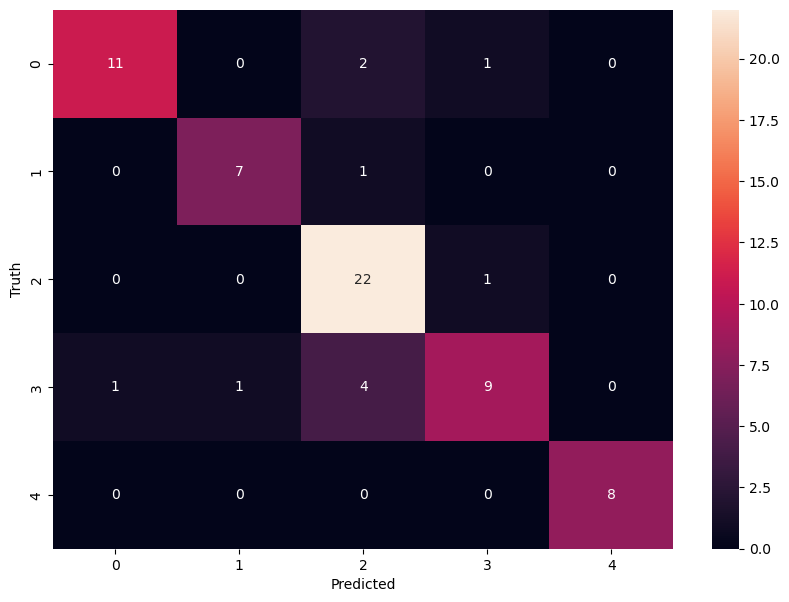

In [116]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True) 
plt.xlabel('Predicted') 
plt.ylabel('Truth')

In [120]:
import joblib
import json

joblib.dump(best_clf, os.path.join("/Users/immortal/Desktop", "saved_model_image.pkl")) # Finaly save our model in the desktop

['/Users/immortal/Desktop/saved_model_image.pkl']

In [121]:
with open(os.path.join("/Users/immortal/Desktop", "class_dictionary.json") , 'w') as f :
    f.write(json.dumps(class_dict)) # save this json file to use it in deployment